In [78]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo


In [79]:
from skimage import data
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.morphology import watershed
from skimage.io import imread
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

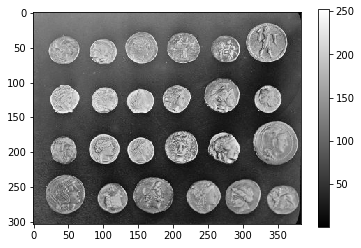

In [80]:
# segment the coins
im = data.coins()
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

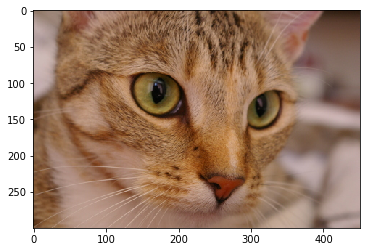

In [81]:
# detect the eyes / nose
im = data.chelsea()
plt.imshow(im);


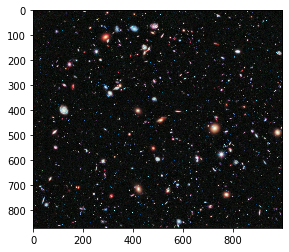

In [82]:
# counting the galaxies
im = data.hubble_deep_field()
plt.imshow(im);

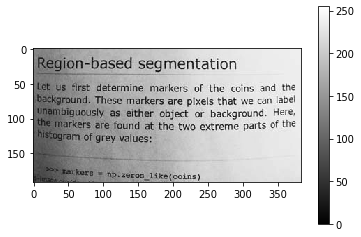

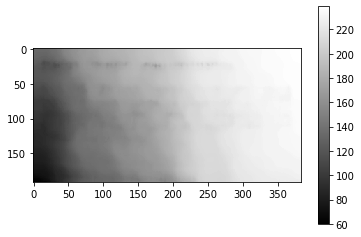

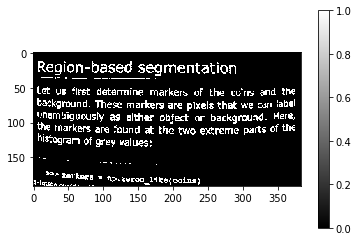

In [83]:
im = data.page()

bg = skr.median(im, disk(10))

res = (1.*im/bg) < .8

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(bg,cmap=plt.cm.gray);
plt.colorbar()
plt.figure()
plt.imshow(res.astype(np.uint8),cmap=plt.cm.gray);
plt.colorbar();


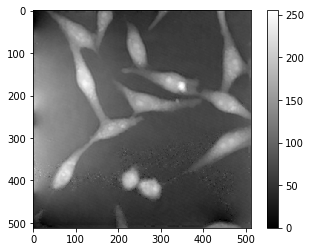

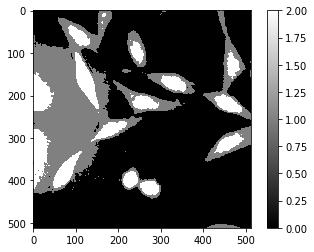

In [84]:
# segment the cells
im = imread('http://homepages.ulb.ac.be/~odebeir/data/dh_phase.png')
th = im>150
th1 = im>100

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(1.*th+th1,cmap=plt.cm.gray)
plt.colorbar();


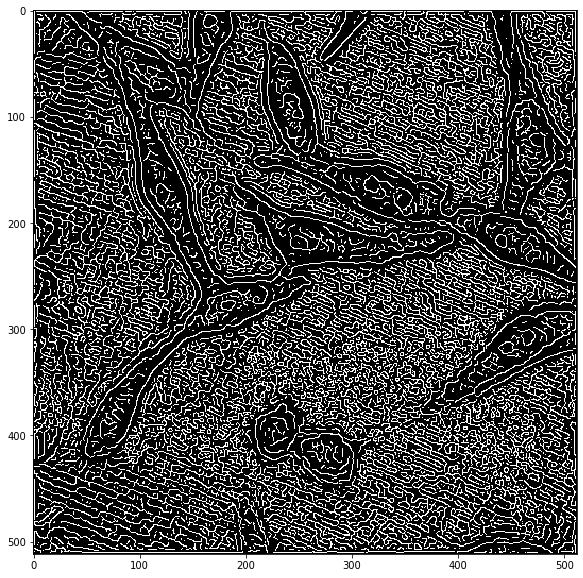

In [85]:
from skimage.feature import canny


ca = canny(im*1.0)

plt.figure(figsize=[10,10])
plt.imshow(ca,cmap=plt.cm.gray);

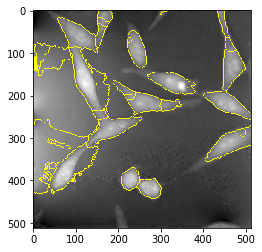

In [86]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
lab,n_lab = label(th,return_num=True)
bg = th1==0
lab[bg] = n_lab+1

#med = skr.median(im,disk(5))
#gr = skr.gradient(med,disk(3))

ws = watershed(255-im,lab)
plt.imshow(mark_boundaries(im,ws))


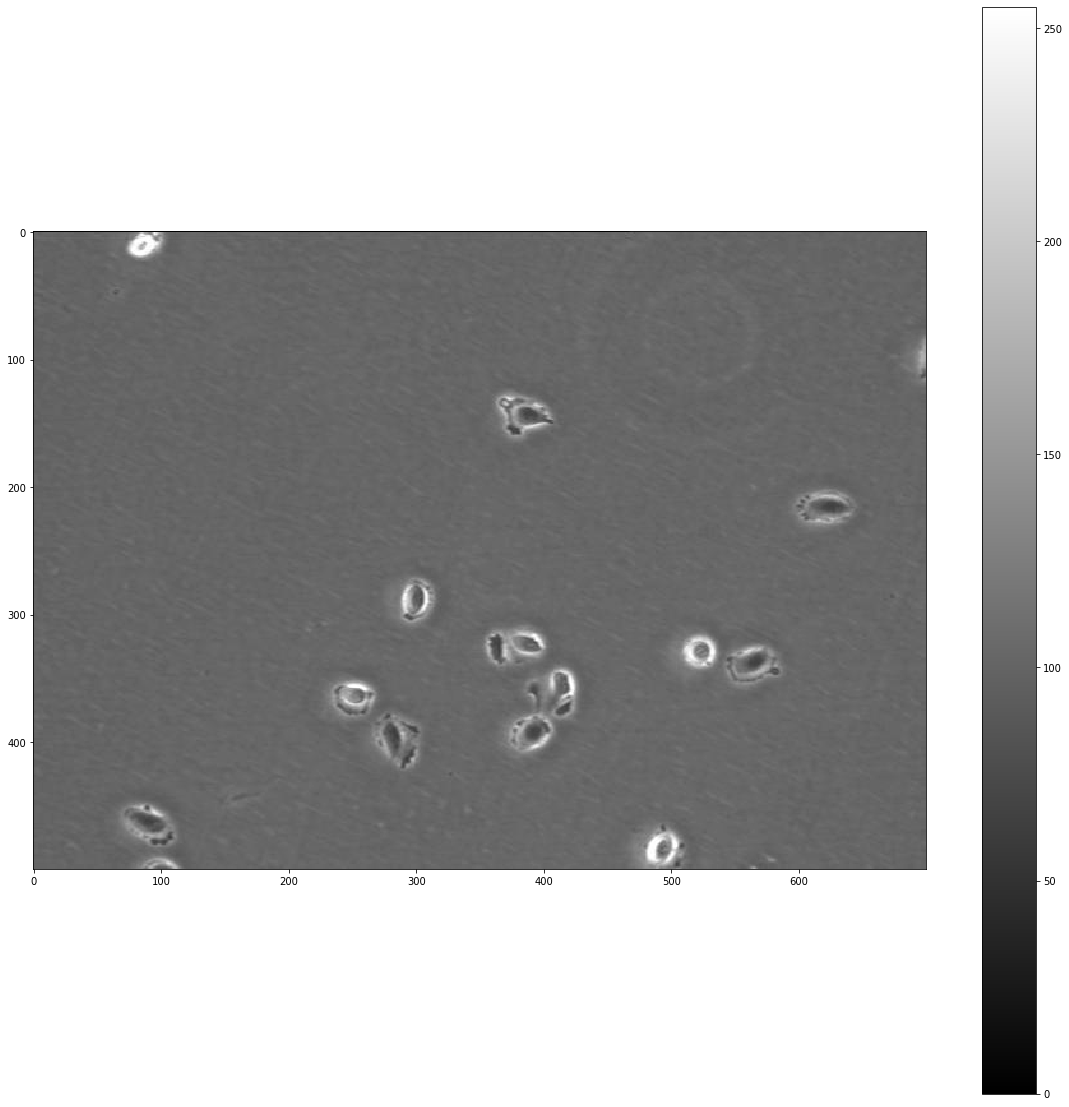

In [87]:
im = imread('http://homepages.ulb.ac.be/~odebeir/data/exp0001.jpg')
plt.figure(figsize=[20,20])
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

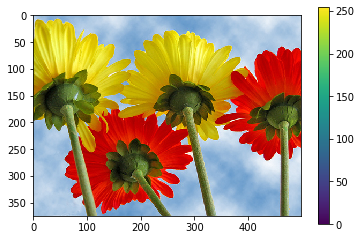

In [88]:
# count red and yellow flowers
im = imread('http://homepages.ulb.ac.be/~odebeir/data/flowers.jpg')
plt.imshow(im)
plt.colorbar();

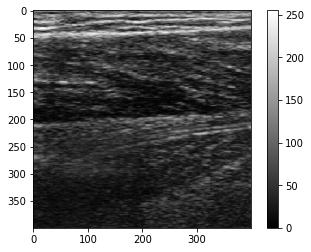

In [89]:
# find the fiber orientation
im = imread('http://homepages.ulb.ac.be/~odebeir/data/image4.png')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

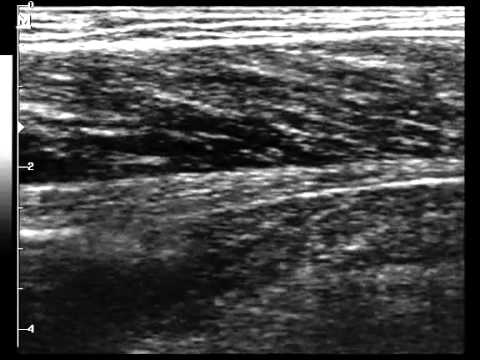

In [90]:
from IPython.display import YouTubeVideo
YouTubeVideo('PUcz11MLxUk', start=0, autoplay=1, theme="light", color="blue",)

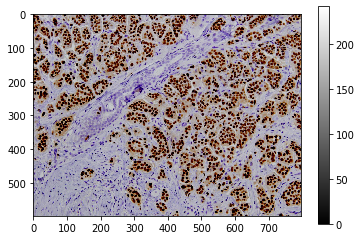

In [91]:
# detect stroma
im = imread('http://homepages.ulb.ac.be/~odebeir/data/Rp042826d.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

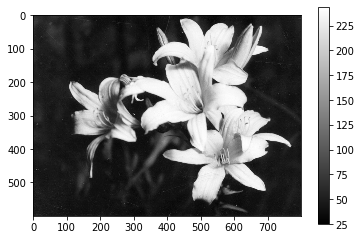

In [92]:
# segment the flowers
im = imread('http://homepages.ulb.ac.be/~odebeir/data/KaneFlowers.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

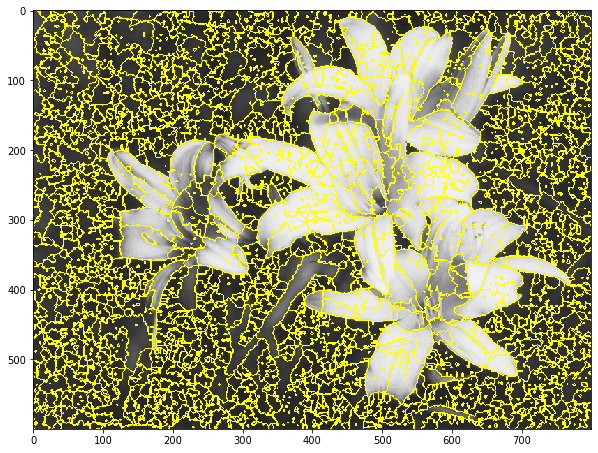

In [93]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries

gr = skr.gradient(im,disk(3))

local_min = im <= skr.minimum(im,disk(5))

lab = label(local_min)

#med = skr.median(im,disk(5))

ws = watershed(gr,lab)

plt.figure(figsize=[10,10])
plt.imshow(mark_boundaries(im,ws))

#plt.imshow(local_min)


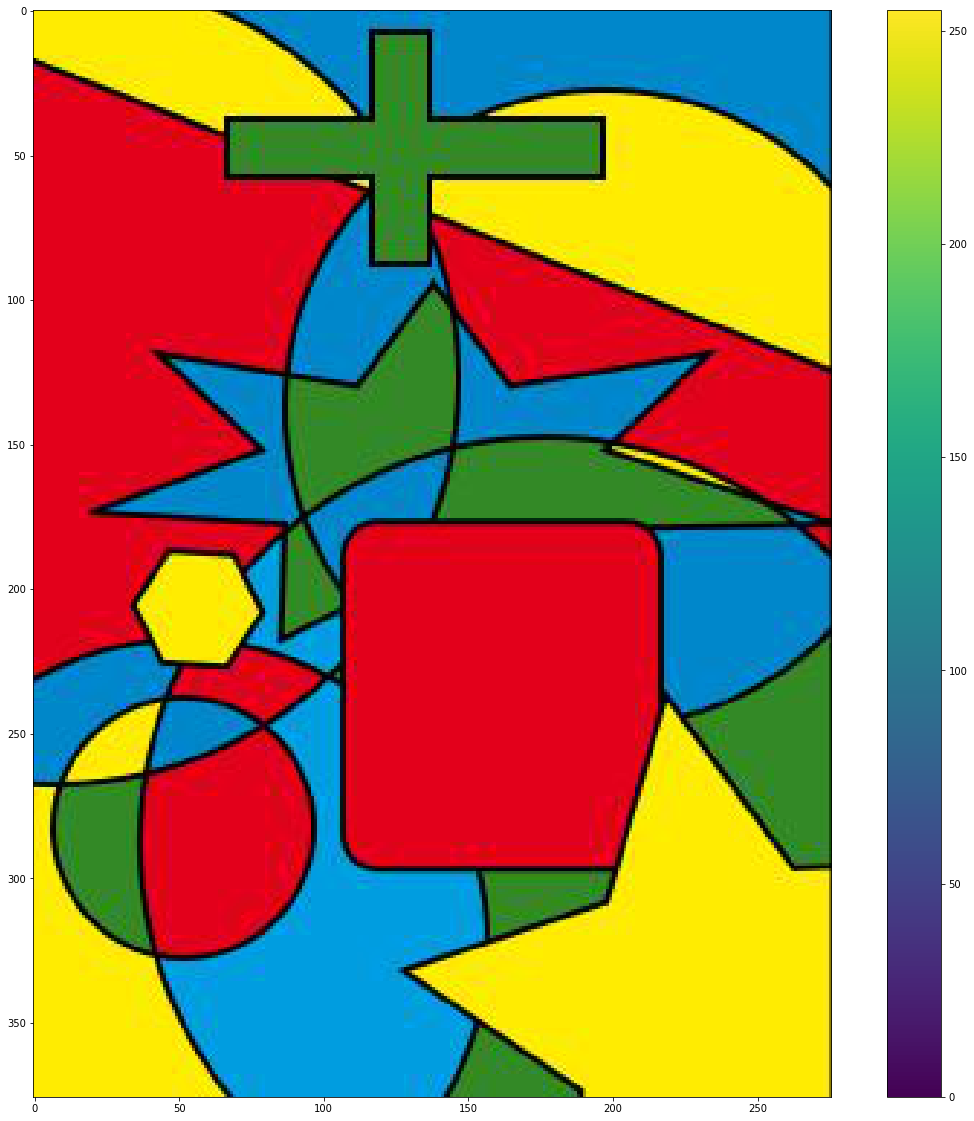

In [94]:
rgb = imread('http://homepages.ulb.ac.be/~odebeir/data/4colors.JPG')

plt.figure(figsize=[20,20])
plt.imshow(rgb)
plt.colorbar();

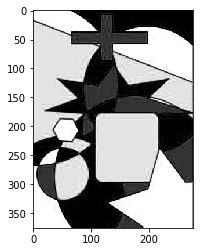

In [95]:
r = skr.median(rgb[:,:,0],disk(1))
plt.imshow(r,cmap=plt.cm.gray)

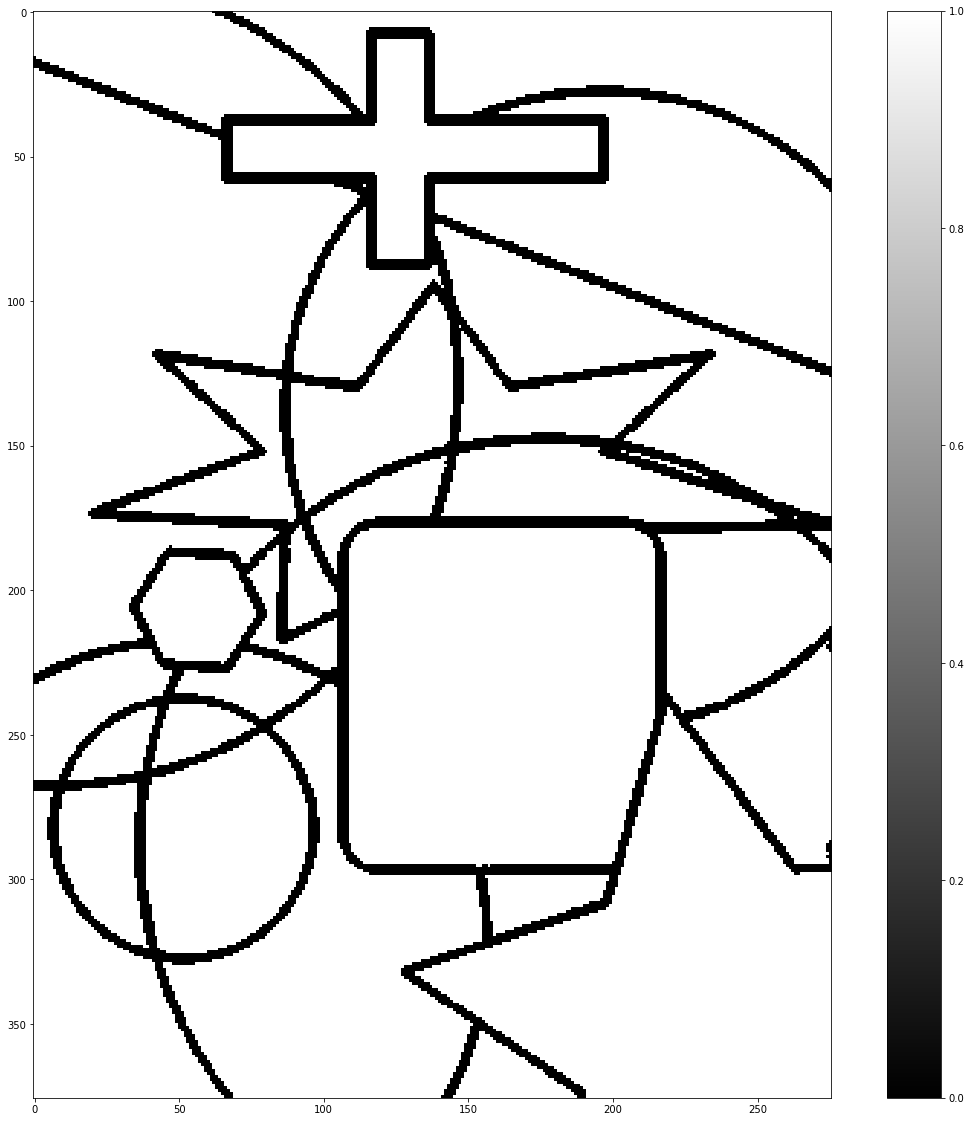

In [96]:
s = rgb.sum(axis=2)
th = s > 100

#post-processing
pth = skr.minimum(th.astype(np.uint8),disk(1))

plt.figure(figsize=[20,20])
plt.imshow(pth,cmap=plt.cm.gray)
plt.colorbar()

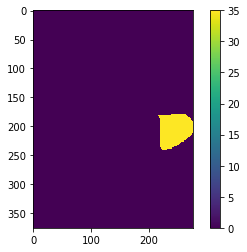

In [97]:
lab = label(pth)

lut = np.arange(0,np.max(lab)+1)

plt.imshow(lab)
plt.colorbar()

mask = lab == 20
plt.imshow(mask)

In [98]:
from random import shuffle
shuffle(lut)

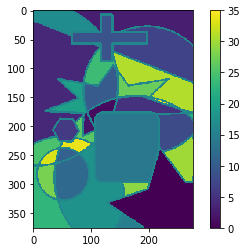

In [99]:
shuffle(lut)
plt.imshow(lut[lab])
plt.colorbar()

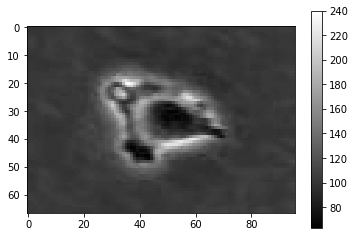

In [100]:
# segment the cell
im = imread('http://homepages.ulb.ac.be/~odebeir/data/exp0001crop.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

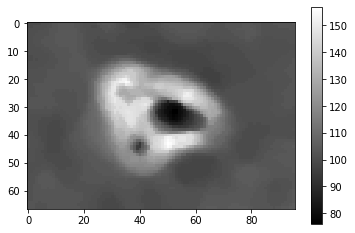

In [101]:
m = skr.median(im,disk(5))
plt.imshow(m,cmap=plt.cm.gray)
plt.colorbar()

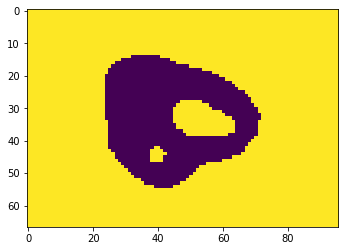

In [102]:
th1 = m < 90

th2 = np.bitwise_and(110 > m,m < 130)

plt.imshow(th2)

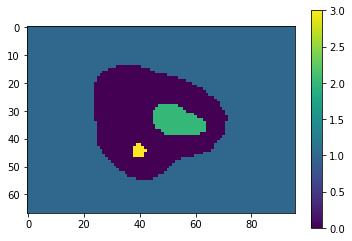

In [103]:
markers = label(th2)
plt.imshow(markers)
plt.colorbar()

In [104]:
markers[markers==3] = 2
ws = watershed(im,markers)

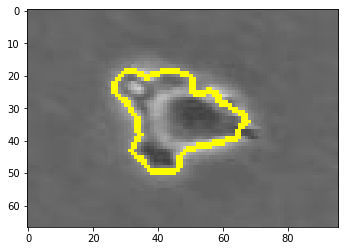

In [105]:
plt.imshow(ws)
plt.imshow(mark_boundaries(im,ws))

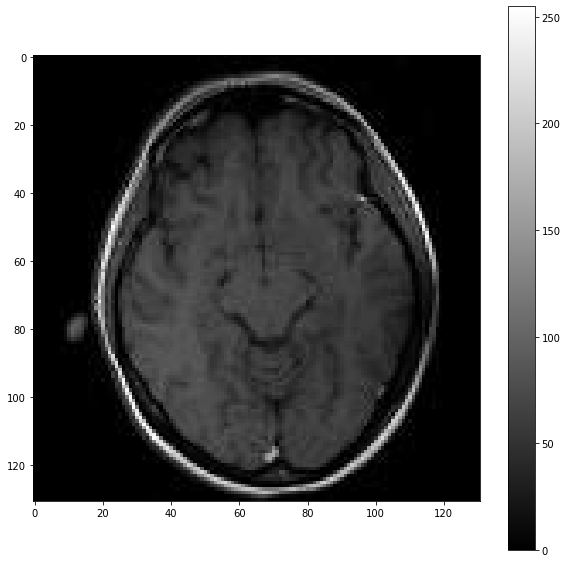

In [106]:
# segment the cell
im = imread('http://homepages.ulb.ac.be/~odebeir/data/brain.jpg')[:,:,0]
plt.figure(figsize=(10,10))
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

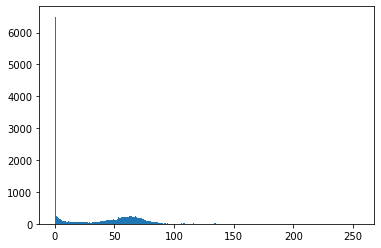

In [107]:
plt.hist(im.flatten(),255);

In [108]:
from skimage.filters import threshold_otsu

t_otsu = threshold_otsu(im)
t_otsu

36

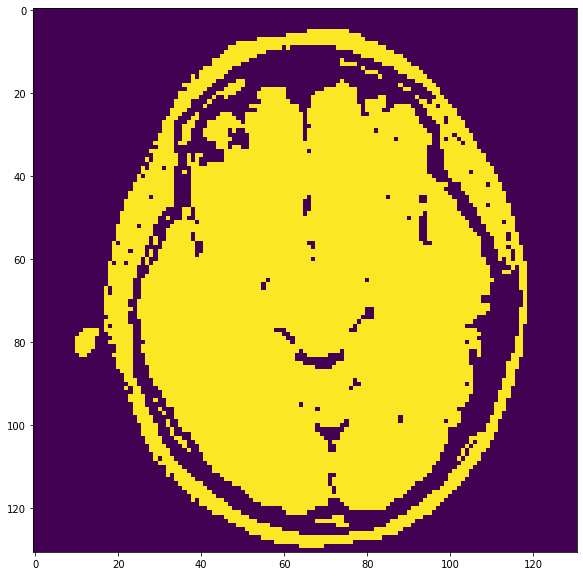

In [109]:
th = im > t_otsu
plt.figure(figsize=(10,10))
plt.imshow(th)

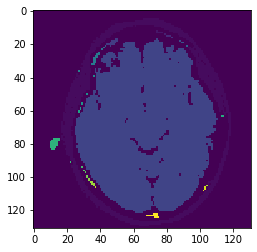

In [110]:
lab = label(th,connectivity=1)
plt.imshow(lab)

In [111]:
from skimage.measure import regionprops

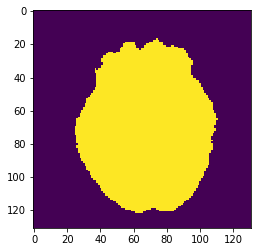

In [112]:
props = regionprops(lab)

brain = lab==7

pp = skr.maximum(brain,disk(3))
pp = skr.minimum(pp,disk(3))

plt.imshow(pp)

In [113]:
for p in props:
    print(p.area, p.label)

1459 1
5 2
1 3
3 4
1 5
16 6
6323 7
1 8
2 9
1 10
1 11
1 12
1 13
16 14
1 15
1 16
1 17
2 18
2 19
2 20
2 21
30 22
1 23
1 24
1 25
1 26
2 27
2 28
5 29
1 30
1 31
2 32
1 33
13 34
